<h2>A Practical Introduction to Numerical Methods </h2>

Hello everyone, my name is Kaleb Huneau and I will be writing a series of notebooks that will be used alongside my video tutorials on youtube. This is a free, open source introduction to numerical methods that may be helpful for exam preparation or for anyone who wants to start working with data in python! 

If anyone is interested, I am a student in Mechanical Engineering at Queen's University and I am also available for private or group tutoring. You can contact me at krhuneau@gmail.com

This guide will walk you through a series of notes, example problems, and practice problems for numerical differentiation, root solving, integration, ODE solving, and more. 

#### This is lesson 1: Numerical Differentiation.

<h3>Numerical Differentiation</h3>

Being able to take the derivative of functions is very useful in optimization for finding a maximum or minimum of a function. Sometimes, a function might be too complicated or just too annoying to find an analytical derivative. This is where numerical derivatives can swoop in and save you a lot of effort.

All numerical approximations of derivatives will be based around the definition of the derivative:
    <img src = "Derivative_Definition.png" style="width:200px;height:70px;">
You have likely seen this definition in your high school class which introduced you to differentiation. 
There are three formulas used for numerical differentiation, the forward, backward, and centred difference.
<img src = "Derivative_Formulas.png" style="width:300px;height:130px;">
The one you have seen above is the forward difference equation. To explain how each one works, lets choose a function $f(x) = x^2$, an x value $x=2$, and an h-value $h=0.01$. In forward difference, the point that you are finding the derivative for is x. This formula takes the function at $x+h$, then subtracts the value of the function at $x$. This value is divided by $h$ which gives the slope at that point. 


Next is the backward difference which uses the function at $x$ and subtracts the function behind it $x-h$.

Finally, we have the centred difference which takes the function at $x+h$, then subtracts the function at $x-h$ and averages this out over $2h$


From here, a small size is chosen for h, and the derivative will be approximated. Here is an example of a function in python:

In [29]:
#import some libraries:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#visualization functions (dont worry about this, its just for me to help show you how the formulas work)
def points(xy): #input is a 2d array of x and y points
    for i in xy:
        plt.scatter(i[0],i[1])
    return

In [43]:
#Define a function to differentiate
def f(x):
    y = x**2
    return y

def forward_diff(f, x, h):      #The input is the function and the point which you would like to derive
    return (f(x + h) - f(x))/h

def backward_diff(f,x,h):
    return (f(x)-f(x-h))/h

def cent_diff(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

In [46]:
# Find the numerical derivatives with different formulas
x = 3
h = 0.01

#lets check the derivative at x = 3 with a really small value of h
print("Forward Difference:",forward_diff(f,x,h))
print("Backward Difference:",backward_diff(f,x,h))
print("Centred Difference:",cent_diff(f,x,h))

Forward Difference: 6.009999999999849
Backward Difference: 5.989999999999895
Centred Difference: 5.999999999999872


As you can see, we succesfully used our formula to make an approximation of the derivative. You can also see the error in the solution since the analytical answer should just be 6. 

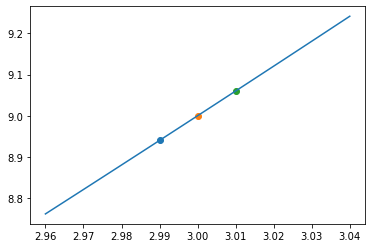

In [58]:
#Visual explanation of how the formulas work
x_vals = np.linspace(2.96,3.04,10)
y_vals = f(x_vals)
xy = [[x-h,f(x-h)],[x,f(x)],[x+h,f(x+h)]]

plt.plot(x_vals,y_vals)
points(xy)

<h4>Error in the Derivative</h4>
<p style = "color:red">Probably good to know but not super important</p>
It turns out that numerical methods are not perfect and there is an error associated with the fact that we are approximating a tangent line with a very small secant. There is also error in floating point numbers which can become a problem if we choose h to be too small.

Lets take a look at how different h-values can affect the output of our derivative.


In [24]:
#demonstration for error when h is too small
h = 0.0001
x = 3

for i in range(12):
    h /= 10
    print("h-value:",h,"\nderivative:",derivative(func,x,h))
print("As you can see, there is an optimal number for h where it is neither too small or too large.")



h-value: 1e-05 
derivative: 6.000009999951316
h-value: 1.0000000000000002e-06 
derivative: 6.0000010009275675
h-value: 1.0000000000000002e-07 
derivative: 6.000000087880152
h-value: 1.0000000000000002e-08 
derivative: 5.999999963535173
h-value: 1.0000000000000003e-09 
derivative: 6.000000496442224
h-value: 1.0000000000000003e-10 
derivative: 6.000000496442224
h-value: 1.0000000000000003e-11 
derivative: 6.000000496442224
h-value: 1.0000000000000002e-12 
derivative: 6.000533403494045
h-value: 1.0000000000000002e-13 
derivative: 6.004086117172846
h-value: 1.0000000000000002e-14 
derivative: 6.217248937900876
h-value: 1e-15 
derivative: 5.329070518200751
h-value: 1.0000000000000001e-16 
derivative: 0.0
As you can see, there is an optimal number for h where it is neither too small or too large.


<h3>Without a Function</h3>
<p>Sometimes when you are given a problem where you need to find the derivative, you are not given a function such as f(x) = x^2. Instead you may be given a set of data and you need to use to points you were given  </p>
When you use a set of data, you dont have to pick a value for h because it is already implicitly defined as the distance between x-values. Lets work through this example where we have some x and y values in a table.

| Point | x | y |
| --- | --- | --- |
| 1 | 1.00 | .66 |
| 2 | 1.03 | .84 |
| 3 | 1.07 | .93 |
| 4 | 1.16 | .95 |
| 5 | 1.36 | .92 |
| 6 | 1.90 | .71 |








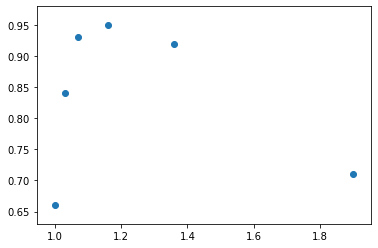

In [60]:
x = np.array([1.00,1.03,1.07,1.16,1.36,1.90])
y = np.array([.66,.84,.93,.95,.92,.71])

plt.scatter(x,y)

In [61]:
def slope(x1,x2,y1,y2):
    m = (y2-y1)/(x2-x1)
    return m
#forward difference
print(slope(x[0],x[1],y[0],y[1]))

#backward difference
print(slope(x[1],x[0],y[1],y[0]))

#centred difference
print(slope(x[2],x[0],y[2],y[0]))




5.999999999999993
5.999999999999993
3.857142857142854
